In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
sp=pd.read_csv('StudentsPerformance.csv')
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [3]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 1. Number of males and females participated in the test

In [4]:
sp['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# 2. students' parental level of education

In [7]:
sp['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

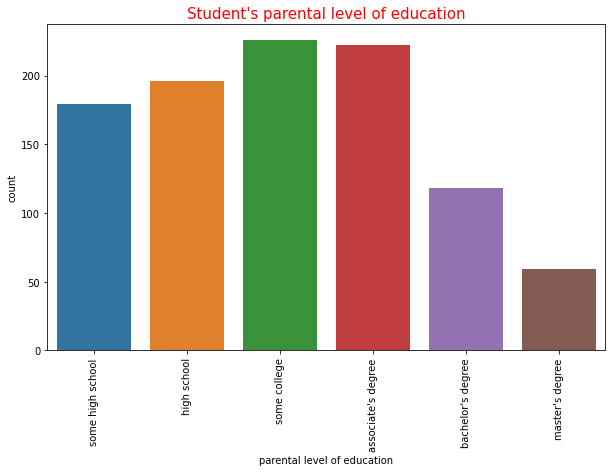

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(data=sp, x='parental level of education')
plt.xticks(rotation=90)
plt.title("Student's parental level of education", c='red', fontsize=15)
plt.show()

Most of the parents are either some college graduates(226 parents) or having an associate's degree(222 parents). Only very few of them have a master's degree.

# 3. Scored the most on average for math, reading and writing based on:

a) Gender :

Mean score

In [9]:
sp.groupby(by='gender').mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


# Mode of score

In [11]:
sp.groupby(by='gender')[['math score', 'reading score', 'writing score']].agg(statistics.mode)

,math score,reading score,writing score
gender,,,
female,65,72,70
male,62,66,68


Female scored most on average for math, reading and writing

# b) Test preparation course :

# Mean score

In [12]:
sp.groupby(by='test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


# Mode score

In [13]:
sp.groupby(by='test preparation course')[['math score', 'reading score', 'writing score']].agg(statistics.mode)

,math score,reading score,writing score
test preparation course,,,
completed,65,74,80
none,62,72,74


Those who completed the test preperation course has scored most on average for math, reading and writing

# 4. Scoring variation for math, reading and writing based on :

# a) Gender :

In [15]:
sp.groupby(by='gender')[['math score', 'reading score', 'writing score']].agg(statistics.stdev)

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


# b) Test preparation course :

In [16]:
sp.groupby(by='test preparation course')[['math score', 'reading score', 'writing score']].agg(statistics.stdev)

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


# 5) Top 25% of students based on their maths score :

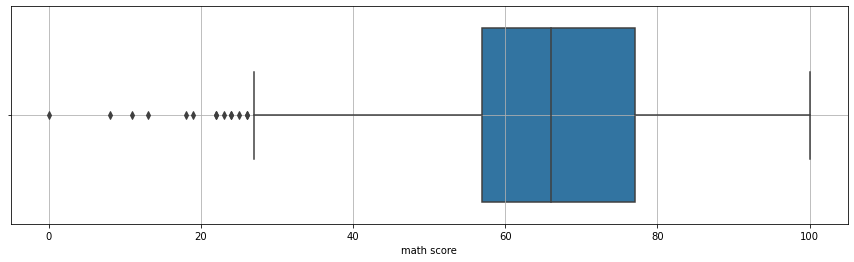

In [17]:
plt.figure(figsize=(15,4))
sns.boxplot(data=sp, x='math score')
plt.grid()
plt.show()

In [18]:
np.quantile(sp['math score'], [0.75, 1])

array([ 77., 100.])

In [19]:
(sp['math score']).quantile(q=[0.75,1])

0.75     77.0
1.00    100.0
Name: math score, dtype: float64